In [6]:
import yfinance as yf
import pandas as pd
import math

# Define the stock ticker and time period
ticker = "NVDA"  # Example: Apple Inc.
start_date = "2023-01-01"
end_date = "2023-12-31"

# Fetch historical stock data
data = yf.download(ticker, start=start_date, end=end_date, multi_level_index = False )






C:\Users\noahc\AppData\Local\Temp\ipykernel_8484\1602344555.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, multi_level_index = False )
[*********************100%***********************]  1 of 1 completed


In [7]:
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2023-01-03,14.302285,14.982681,14.083480,14.837809,401277000
2023-01-04,14.735901,14.839809,14.228353,14.554063,431324000
2023-01-05,14.252331,14.551065,14.135434,14.478130,389168000
2023-01-06,14.845804,14.996670,14.021537,14.461146,405044000
2023-01-09,15.614120,16.041740,15.127553,15.270426,504231000


In [8]:
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()


In [9]:
data['vol'] = data['Close'].pct_change().rolling(window=21).std() * math.sqrt(252)

In [10]:
data["pct_rank"] = data["Close"].rolling(window=21).rank(pct=True)

In [11]:
to_plot = ["Close", "SMA20", "SMA50"]

<Axes: xlabel='Date'>

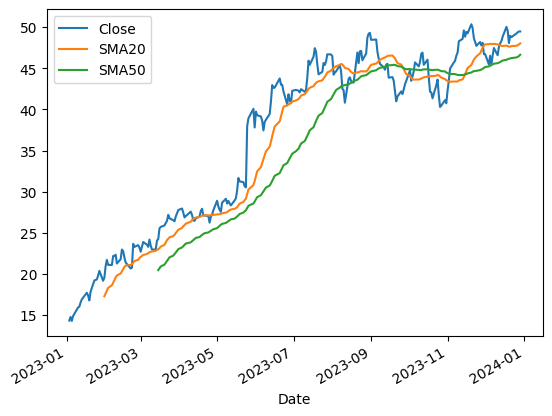

In [12]:
data[to_plot].plot()

<Axes: >

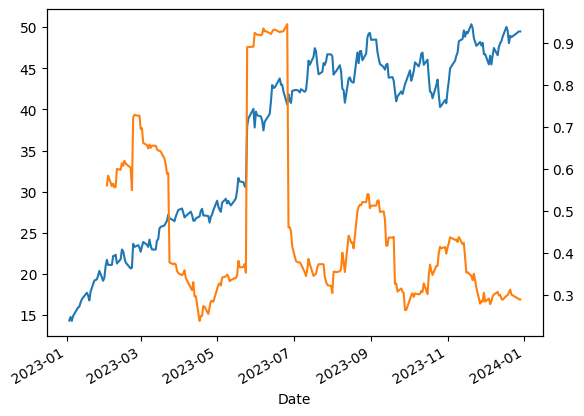

In [13]:
ax = data["Close"].plot()
data.vol.plot(secondary_y = True, ax=ax)

<Axes: xlabel='Date'>

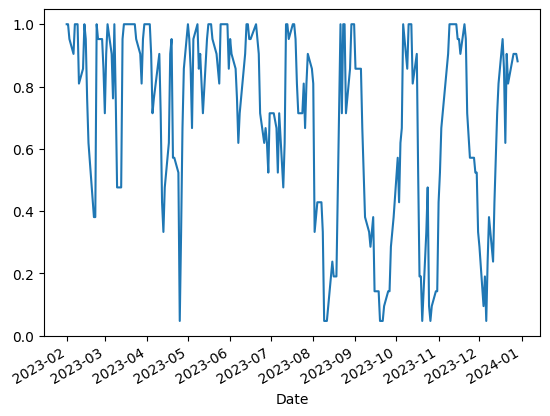

In [14]:
data['pct_rank'].plot()

In [15]:
data

,Close,High,Low,Open,Volume,SMA20,SMA50,vol,pct_rank
Date,,,,,,,,,
2023-01-03,14.302285,14.982681,14.083480,14.837809,401277000,NaN,NaN,NaN,NaN
2023-01-04,14.735901,14.839809,14.228353,14.554063,431324000,NaN,NaN,NaN,NaN
2023-01-05,14.252331,14.551065,14.135434,14.478130,389168000,NaN,NaN,NaN,NaN
2023-01-06,14.845804,14.996670,14.021537,14.461146,405044000,NaN,NaN,NaN,NaN
2023-01-09,15.614120,16.041740,15.127553,15.270426,504231000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-12-22,48.808281,49.361033,48.445440,49.173116,252507000,47.709674,46.260385,0.299819,0.809524
2023-12-26,49.257076,49.577933,48.938218,48.946214,244200000,47.761712,46.336791,0.292529,0.904762
2023-12-27,49.395016,49.657899,49.063163,49.488976,233648000,47.841687,46.403283,0.291088,0.904762
